<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data  -o fruits_300.npy
!ls-al

# 다운받는 명령어였으므로 필요x

/bin/bash: line 1: ls-al: command not found


(300, 100, 100)
(300, 10000)
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 3 3 3 3 1 3 1 1 3 3 3 3 1 1 1 1 3 1 1
 3 3 3 3 3 3 3 1 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 1
 3 3 3 1 3 3 3 3 1 3 3 3 1 1 0 3 3 3 1 1 3 3 3 1 3 3 3 3 1 1 3 3 3 3 1 1 1
 1 3 1 3]


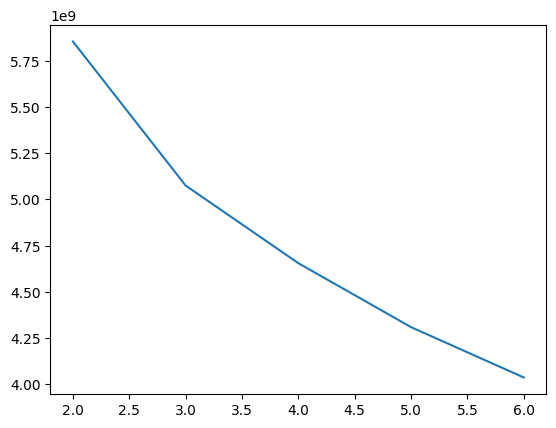

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, random_state = 42)      # n_clusters = k, k개의 그룹으로 분류
km.fit(fruits_2d)                                   # 무슨 과일이 있는지도 모르는데 어떻게 k를 정하지?
print(km.labels_)                                   # = 뭔지는 모르겠지만 0,1,2 그룹으로 나눔

from sklearn.cluster import KMeans
inertia =[]                                         # inertia: 클러스터 중심과 샘플 사이의 거리의 제곱합, 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타냄
for k in range(2,7) :
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2,7), inertia)

- inertia: 클러스터 중심과 샘플 사이의 거리의 제곱합, 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타냄

- 클러스터 개수가 늘어나면 이너셔는 작아짐 (과대적합..각 클러스터가 더 세분화되어 중심과의 거리가 줄어들기 때문)
- <-> 반대는?
- 클러스터 개수가 적어지면 이너셔가 많아짐 (과소적합..서로 다른 데이터들이 같은 클러스터에 묶이게 되어, 클러스터 내부의 다양성이 커지게 됨)
- 클러스터의 개수를 증가시키면 이너셔는 감소하는데, 감소하는 크기가 꺾이는 지점이 엘보우

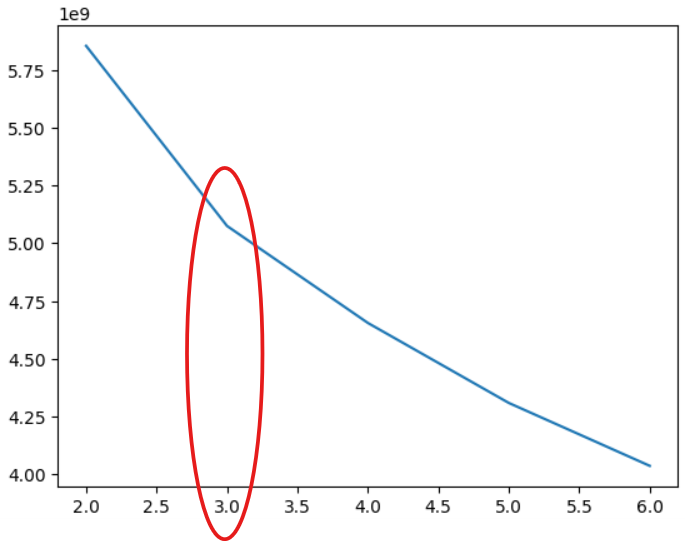

##⚠ 엘보우 방법의 한계
- 팔꿈치가 명확하지 않은 경우가 많음
→ 그래프가 완만하게 감소하면 어디가 최적점?
- 이너셔만고려함
→ 클러스터 간의 분리도(separation)나 밀
집도(compactness)는 고려하지 않음.
- 고차원 데이터에선 부정확 할 수 있음
→ 시각화가 어려워지고,이너셔가 클러스터 품질을 제대로 반영하지 않을 수 있음.
- 클러스터 수가 많을수록 과적합 위험
→ 이너셔는 클러스터 수가 많아질수록 무조건 줄어들기 때문에,너무 많은 클러스터를 선택할 수 있음.